In [5]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

In [33]:
def resize_foreground(foreground, background):
    bg_height, bg_width = background.shape[:2]
    fg_height, fg_width = foreground.shape[:2]

    if fg_height < bg_height and fg_width < bg_width:
        return foreground

    # Calculate scaling factors for width and height
    scale_width = bg_width / fg_width
    scale_height = bg_height / fg_height

    # Choose the minimum scaling factor to maintain aspect ratio
    scale_factor = min(scale_width, scale_height)

    # Resize the foreground image
    resized_foreground = cv2.resize(foreground, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_AREA)

    # If the foreground has an alpha channel, resize it accordingly
    if len(resized_foreground.shape) == 3 and resized_foreground.shape[2] == 4:
        alpha = resized_foreground[:, :, 3]
        alpha = cv2.resize(alpha, (resized_foreground.shape[1], resized_foreground.shape[0]), interpolation=cv2.INTER_AREA)
        resized_foreground = resized_foreground[:, :, :3]

        # Merge resized foreground with resized alpha channel
        resized_foreground = cv2.merge((resized_foreground, alpha))
    return resized_foreground

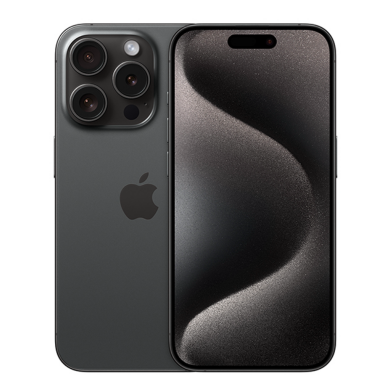

(600, 600, 3)

In [34]:
f = resize_foreground(cv2.imread("iphone_15.jpeg"), cv2.imread('3625454299.png'))
plt.axis('off')
plt.imshow(f)
plt.show()
f.shape

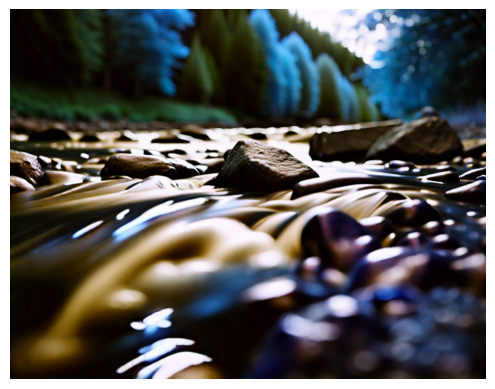

In [37]:
# foreground = resize_foreground(cv2.imread("iphone_15.jpeg"), cv2.imread('3625454299.png'))
foreground = cv2.imread("iphone_15.jpeg")
background = cv2.imread('3625454299.png')

# foreground.shape
plt.axis('off')
plt.imshow(background)
plt.show()

In [29]:
gray = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

# figure out to not crop the background, but resize the foreground (product image) to fit into the background
# if the width and height of the foreground is smaller than the background, should we crop?
crop_background = cv2.resize(background, (foreground.shape[1], foreground.shape[0]), interpolation = cv2.INTER_NEAREST)
_, mask = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
mask = mask.astype(np.float64) / 255

result = (foreground * mask + crop_background * (1 - mask))
result = result.clip(0, 255).astype(np.uint8)

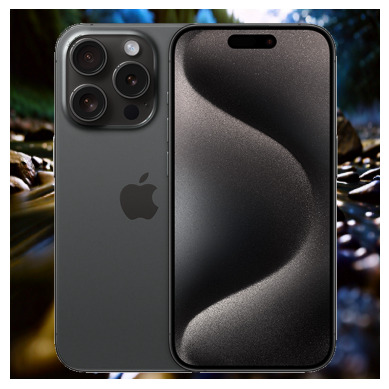

In [30]:
plt.imshow(result)
plt.axis('off')
plt.show()